<a href="https://colab.research.google.com/github/jmora67248-ui/Ciencia-de-datos/blob/main/Actividad27OctEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis exploratorio de datos

Pasos EDA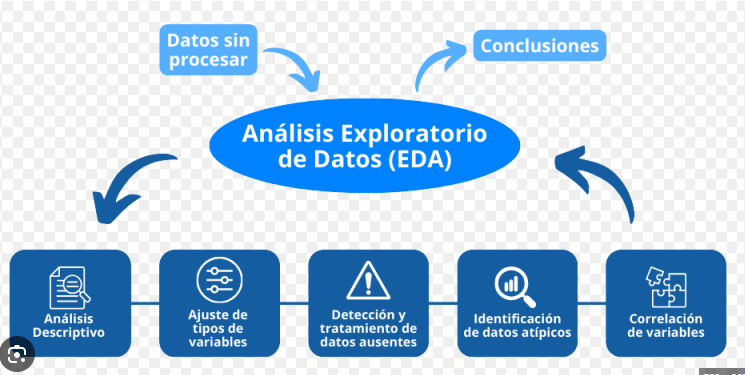

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Titanic.csv')


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



* PassengerId: numero identidentificación del pasajero
* Survived: numero binario 1 sobrevivio 0 murio   
*  Pclass:Clase de tiquete que tenia el pasajero (1,2,3)
*  Name: Nombre del pasajero
*  Sex: Genero  Male/Female
*  Age: Edad
*  SibSp: Numero de Hermanos o esposas en el barco
*  Parch: Numero de padres o hijos
*  Ticket: Id del tiquete
*  Fare: Valor del tiquete
*  Cabin: Numero de la habitación
*  Embarked: Port of Embarkation:C = Cherbourg, Q = Queenstown, S = Southampton





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
def bar_char(feature):
  survived=df[df['Survived']==1][feature].value_counts()
  dead=df[df['Survived']==0][feature].value_counts()
  df_feat=pd.DataFrame([survived,dead])
  test=pd.DataFrame([survived,dead])
  test.index=["sobrevivientes","Fallecidos"]
  test.plot(kind="bar",stacked=True,figsize=(10,5))

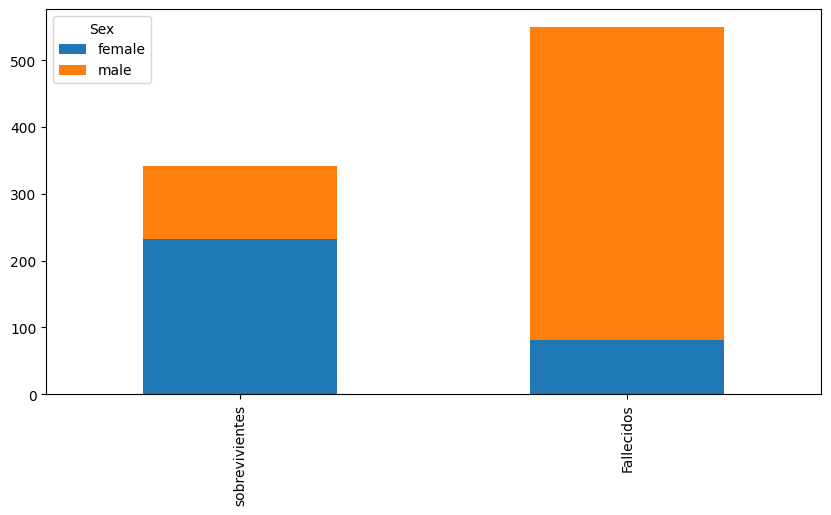

In [ ]:
bar_char("Sex")

La grafica señala que las mujeres tuvieron mayor probabilidad de supervivencia

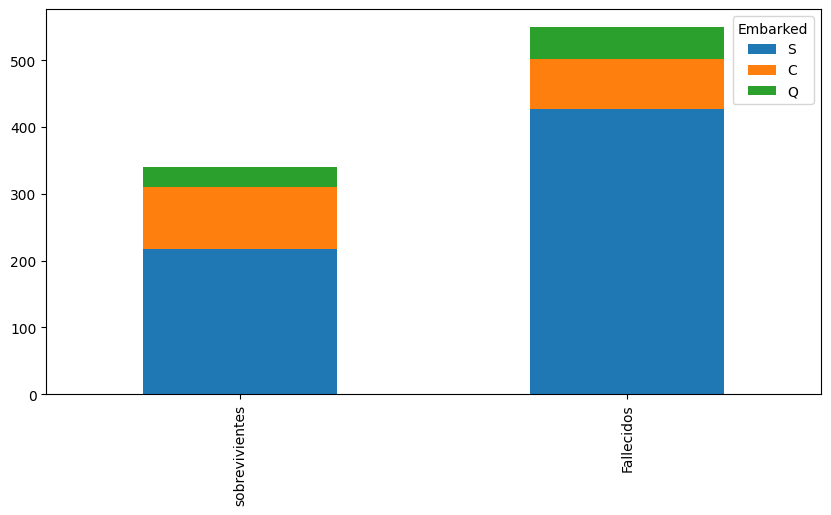

In [ ]:
bar_char("Embarked")

La grafica señala que los pasajeros que embarcaron en S tiene peor tasa de supervivencia, mientras que Q tuvo la mejor posibilidad de sobrevivir

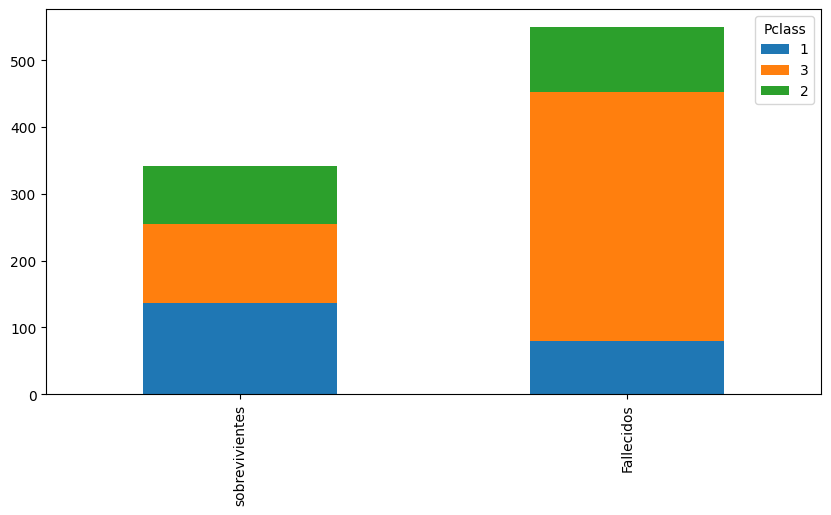

In [ ]:
bar_char("Pclass")

PClass1 tiene mayor probabilidad de sobrevivir con respecto a pclass3

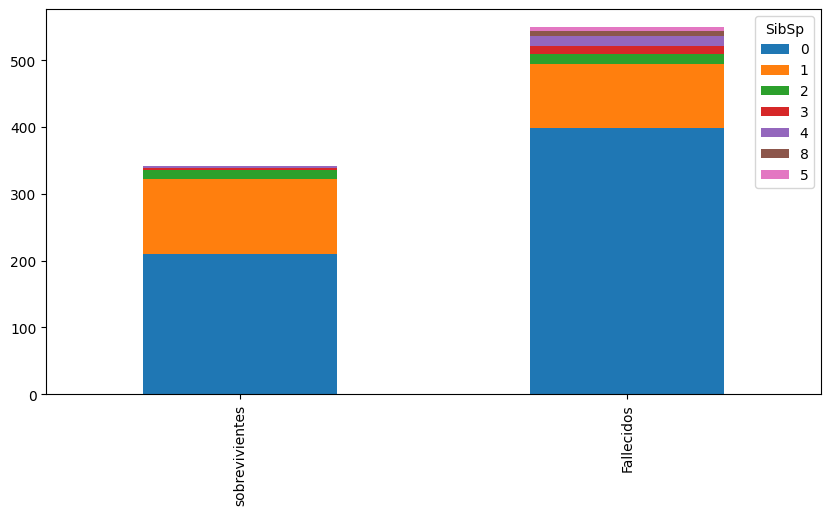

In [ ]:
bar_char("SibSp")

Las personas solteras presentan una menor probabilidad de sobrevivr que las que tenian un hermano o esposa

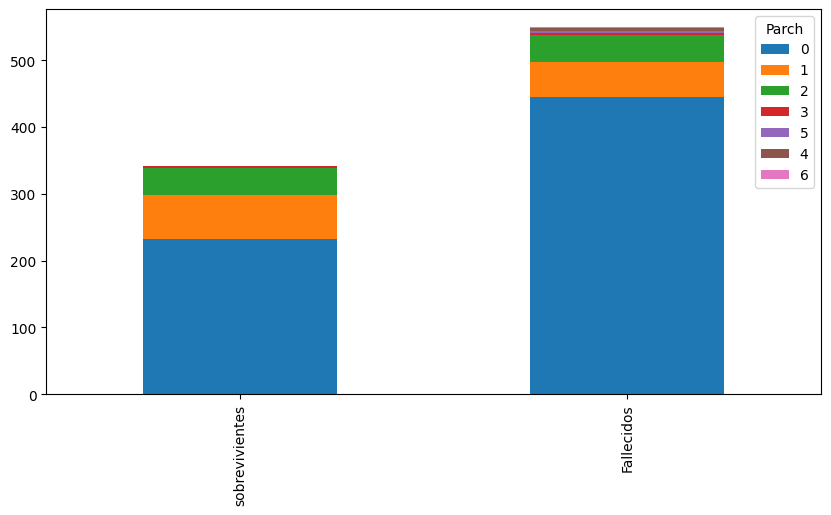

In [ ]:
bar_char("Parch")

La grafica muestra que la probabilidad de sobrevivir aumentaba si tenia 1 hasta 3 hijos, disminuia si tenia 0 o mas de 3 hijos

#Ingenieria de Caracteristicas
Esl proceso de usar el dominio del conocimiento para crear nuevas caracteristicas (feature vector) que logre que los algoritmos de machine learning funcionen adecuadamente.

In [ ]:
def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)
  return titles

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1131372151.py:2: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)


In [ ]:
df["Title"]=extract_title(df)

In [ ]:
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


### creando un mapeo de titulos

Para ello reemplazamos titulos de la siguiente manera

* Mr=0
* Miss=1
* Mrs=2
* Otros=3

In [ ]:
def replace_titles(data):
  title_mapping={"Mr":0,"Miss":1, "Mrs":2}
  data["Title"]=data["Title"].map(title_mapping).fillna(3)
  return data

In [ ]:
replace_titles(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.0


In [ ]:
df[["Name","Title"]].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


## Reparando la edad


In [ ]:
title_age_means=df.groupby("Title")["Age"].mean()
title_age_means

,Age
Title,
Capt,70.000000
Col,58.000000
Countess,33.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167


In [ ]:
df["Age"]=df.apply(lambda row: title_age_means[row["Title"]] if pd.isnull(row["Age"]) else row["Age"],axis=1)


In [ ]:
df[["Title","Age"]].head(10)

,Title,Age
0,Mr,22.00000
1,Mrs,38.00000
2,Miss,26.00000
3,Mrs,35.00000
4,Mr,35.00000
5,Mr,32.36809
6,Mr,54.00000
7,Master,2.00000
8,Mrs,27.00000
9,Mrs,14.00000


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


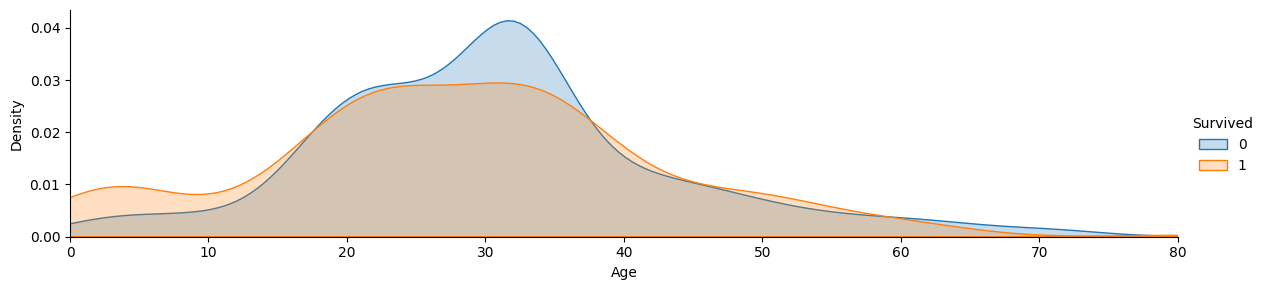

In [ ]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


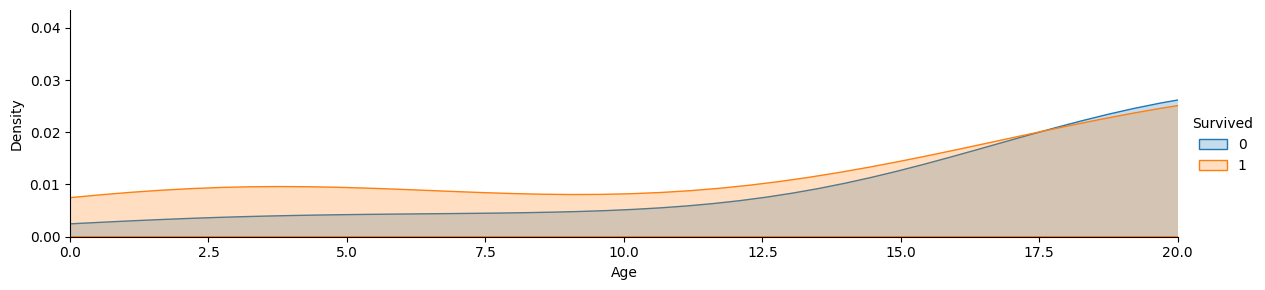

In [ ]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(0,20)
plt.show()

#Tarea
 Hacer el  analisis que se hizo con titles ahora con fare

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


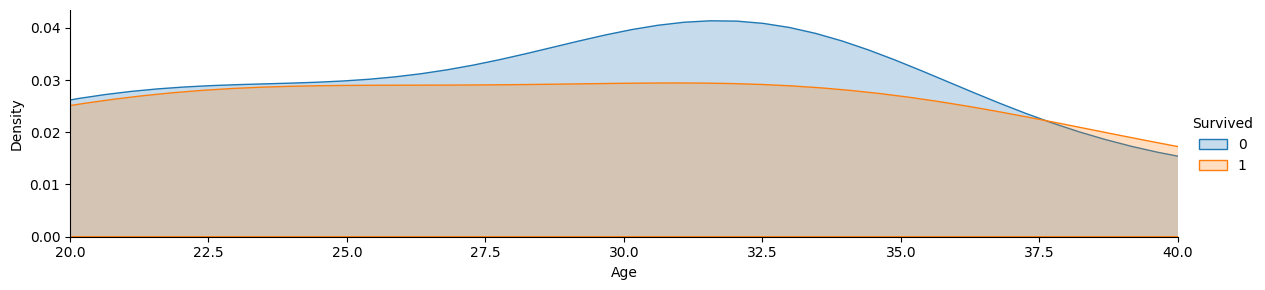

In [ ]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(20,40)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


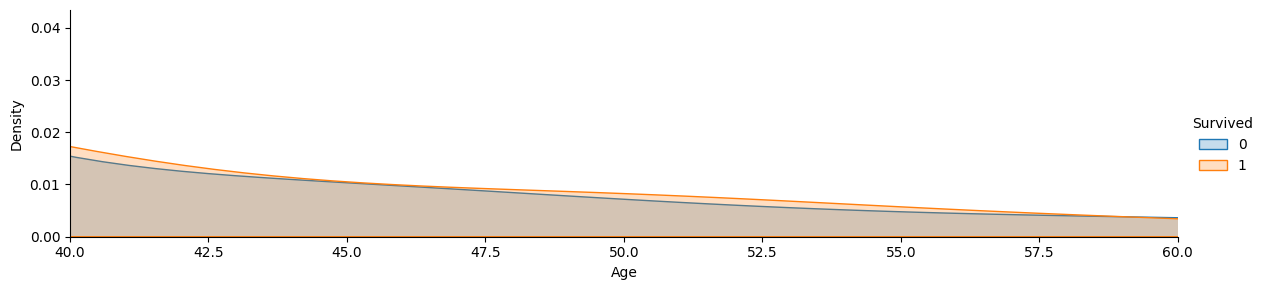

In [ ]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(40,60)
plt.show()

Binning

Convertir una variable numerica a categorica, en este caso edad mapear


* niños:0
* joven:1
* adulto:2
* edad madura:3
* Edad Avanzada:4

In [ ]:
df["Age_category"]=pd.cut(df["Age"], bins=[0,16,26,36,62,float("inf")],labels=[0,1,2,3,4],right=False)

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,Mr,2
5,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,NaN,Q,Mr,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,Mr,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S,Master,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S,Mrs,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,NaN,C,Mrs,0


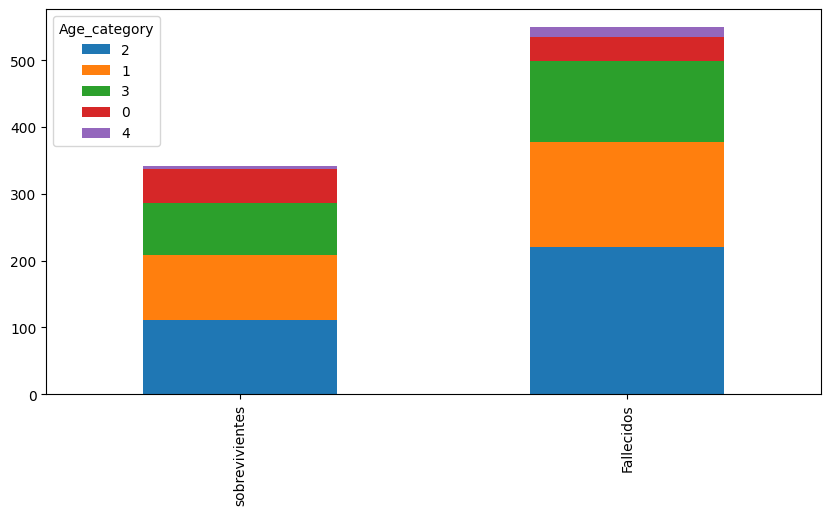

In [ ]:
bar_char("Age_category")

Hacer esto con Fare, analizar los rangos con embarque, crear una nueva fearute y dependiendo del embarque pueden salir nuevas cositas

#Tarea.
##Analisis Fare

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Valores nulos en Fare: 0


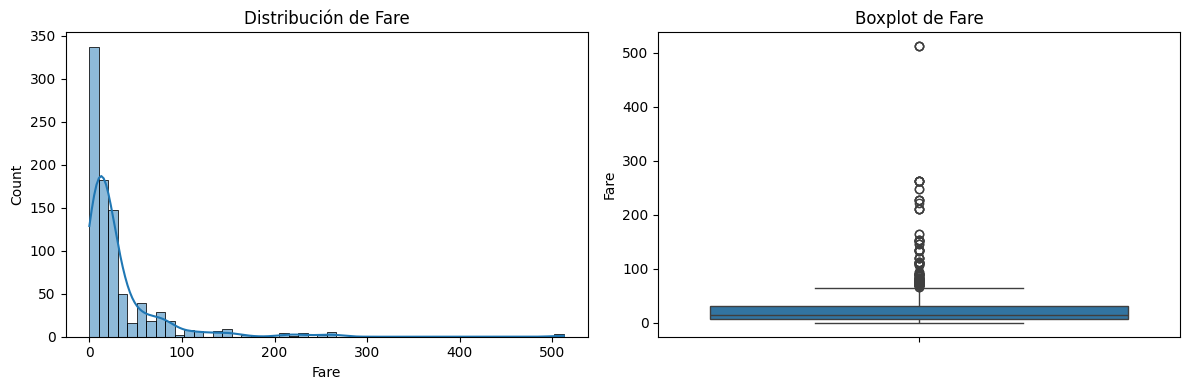

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


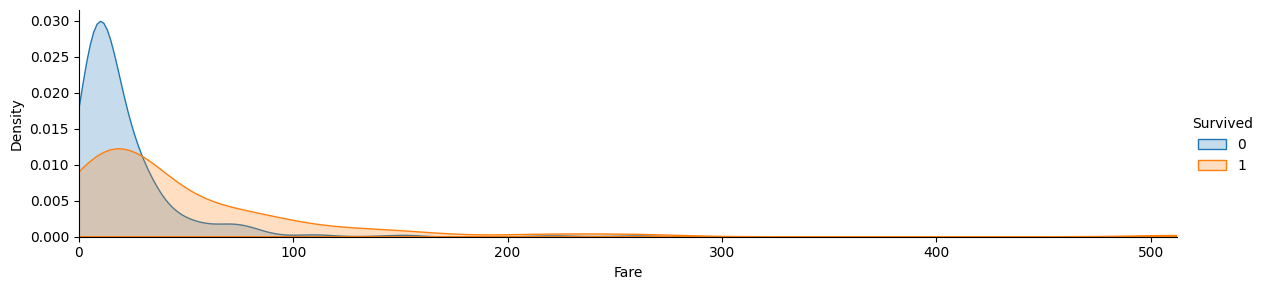


Fare promedio por supervivencia:
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


In [ ]:
# Explorar estadísticas básicas de Fare
print(df['Fare'].describe())
print("\nValores nulos en Fare:", df['Fare'].isnull().sum())

# Visualizar distribución de Fare
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Fare', bins=50, kde=True)
plt.title('Distribución de Fare')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Fare')
plt.title('Boxplot de Fare')
plt.tight_layout()
plt.show()

# Análisis de Fare por supervivencia
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Fare", shade=True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.show()

# Estadísticas por grupo de supervivencia
print("\nFare promedio por supervivencia:")
print(df.groupby('Survived')['Fare'].mean())

* # La variable "Fare" (Tarifa) está fuertemente sesgada a la derecha; la gran mayoría de los pasajeros pagó tarifas muy bajas (la mediana es solo 14.45). Esta concentración en tarifas económicas coincide con el pico de densidad más alto del grupo que no sobrevivió (color azul en la primera gráfica).

* # Existe una clara correlación positiva entre la tarifa y la supervivencia. El precio promedio pagado por los supervivientes (48.39) fue más del doble que el de los no supervivientes (22.11). La distribución de los supervivientes (naranja) es más plana y se extiende mucho más hacia las tarifas altas.

#Binning Cuartiles

Fare_category
Medio       224
Bajo        223
Alto        222
Muy Alto    222
Name: count, dtype: int64


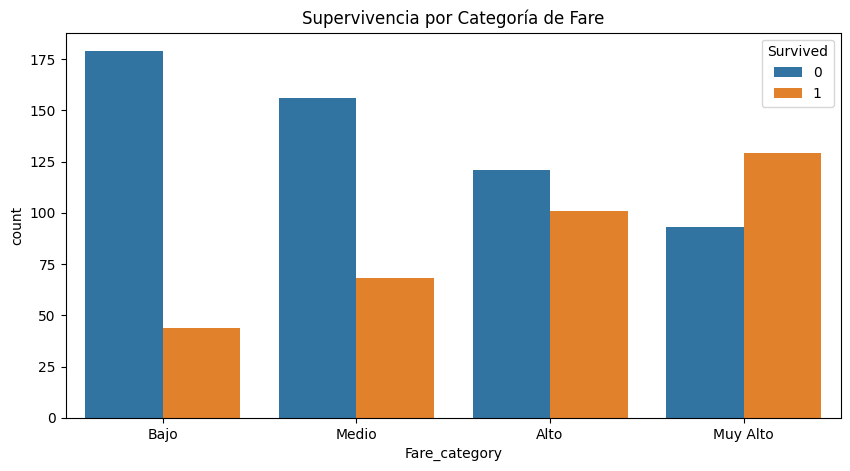


Tasa de supervivencia por categoría de Fare:
Fare_category
Bajo        0.197309
Medio       0.303571
Alto        0.454955
Muy Alto    0.581081
Name: Survived, dtype: float64


/tmp/ipython-input-722363901.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby('Fare_category')['Survived'].mean()


In [ ]:
# Opción 1: Binning por cuartiles
df['Fare_category'] = pd.qcut(df['Fare'], q=4, labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Opción 2: Binning manual (basado en la distribución del Titanic)
# bins = [0, 7.91, 14.45, 31, float('inf')]
# df['Fare_category'] = pd.cut(df['Fare'], bins=bins, labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Ver distribución
print(df['Fare_category'].value_counts())

# Visualizar Fare_category vs Survived
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Fare_category', hue='Survived')
plt.title('Supervivencia por Categoría de Fare')
plt.show()

# Tasa de supervivencia por categoría
fare_survival = df.groupby('Fare_category')['Survived'].mean()
print("\nTasa de supervivencia por categoría de Fare:")
print(fare_survival)

#Análisis de puerto de embarque

Valores en Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Valores nulos en Embarked: 2


/tmp/ipython-input-3384355713.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


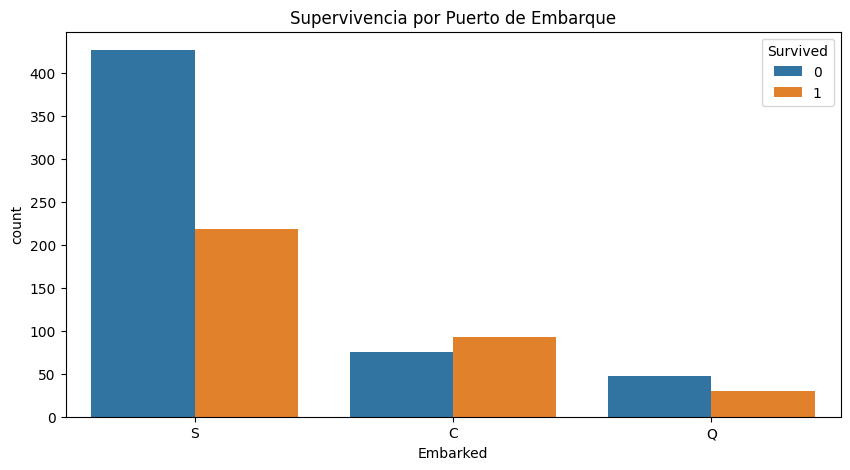


Tasa de supervivencia por puerto:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [ ]:
# Explorar valores en Embarked
print("Valores en Embarked:")
print(df['Embarked'].value_counts())
print("\nValores nulos en Embarked:", df['Embarked'].isnull().sum())

# Rellenar valores nulos con la moda (más frecuente)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Visualizar Embarked vs Survived
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Supervivencia por Puerto de Embarque')
plt.show()

# Tasa de supervivencia por puerto
embarked_survival = df.groupby('Embarked')['Survived'].mean()
print("\nTasa de supervivencia por puerto:")
print(embarked_survival)

#A partir de la gráfica, se concluye que el puerto de embarque ("Embarked") está fuertemente correlacionado con la supervivencia.

#Aunque la gran mayoría de los pasajeros embarcó en Southampton ('S'), este grupo tuvo la tasa de supervivencia más baja (aproximadamente 34%). Por el contrario, los pasajeros que embarcaron en Cherbourg ('C') tuvieron la tasa de supervivencia más alta, superando el 55%.

Fare_category  Bajo  Medio  Alto  Muy Alto
Embarked                                  
C                34     18    42        74
Q                51      6    18         2
S               138    200   162       146

Fare promedio por puerto:
Embarked
C    59.954144
Q    13.276030
S    27.243651
Name: Fare, dtype: float64


/tmp/ipython-input-1049267183.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Embarked', y='Fare', hue='Survived', ci=None)


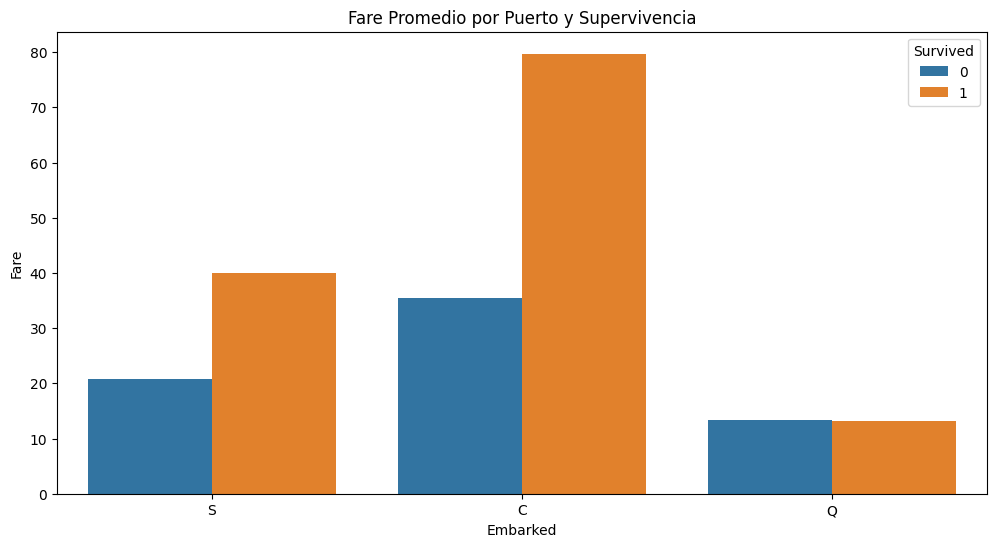

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

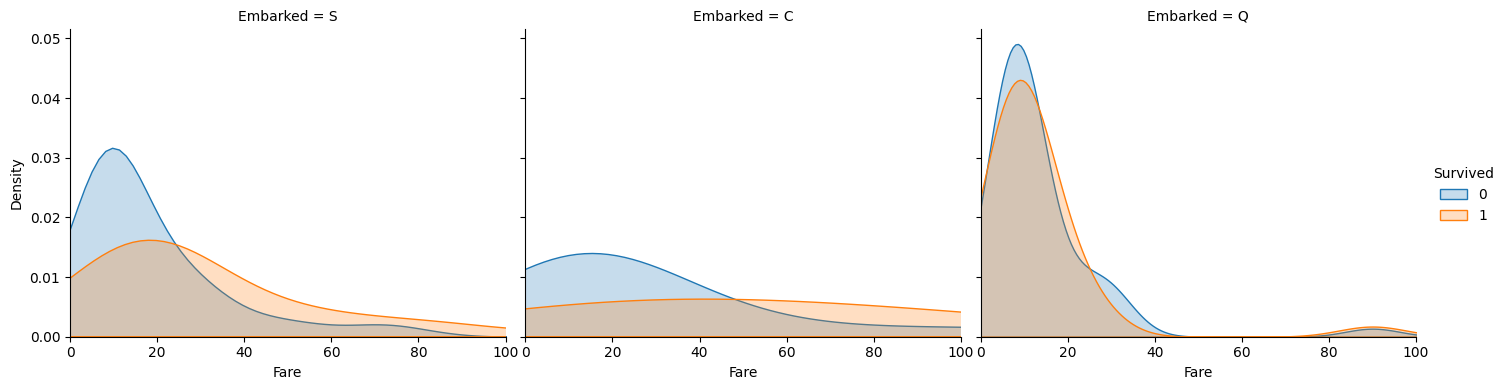

In [ ]:
# Crosstab de Embarked y Fare_category
print(pd.crosstab(df['Embarked'], df['Fare_category']))

# Fare promedio por puerto
print("\nFare promedio por puerto:")
print(df.groupby('Embarked')['Fare'].mean())

# Visualización combinada
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Embarked', y='Fare', hue='Survived', ci=None)
plt.title('Fare Promedio por Puerto y Supervivencia')
plt.show()

# Facet grid: Embarked vs Fare colored by Survived
g = sns.FacetGrid(df, col='Embarked', hue='Survived', height=4, aspect=1.2)
g.map(sns.kdeplot, 'Fare', shade=True)
g.add_legend()
g.set(xlim=(0, 100))
plt.show()

##El puerto de embarque es un fuerte indicador de la tarifa pagada. Los pasajeros que embarcaron en Cherbourg ('C') pagaron, en promedio, las tarifas más altas (59.95), con una alta concentración de pasajeros en las categorías "Alto" y "Muy Alto". Por el contrario, los pasajeros de Queenstown ('Q') pagaron las tarifas más bajas (13.27), estando la mayoría en la categoría "Bajo".


##La relación entre tarifa y supervivencia cambia según el puerto. En Cherbourg ('C') y Southampton ('S'), los supervivientes pagaron tarifas significativamente más altas que los no supervivientes.


##Sin embargo, en Queenstown ('Q'), la tarifa fue uniformemente baja para ambos grupos (supervivientes y no supervivientes), lo que sugiere que la tarifa no fue un factor determinante para la supervivencia en ese puerto específico.

In [ ]:
# Feature: Fare por persona (considerando familia)
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Fare_per_person'] = df['Fare'] / df['Family_Size']

# Feature: ¿Viaja solo?
df['Is_Alone'] = (df['Family_Size'] == 1).astype(int)

# Feature: Combinación de Embarked y Pclass
df['Embarked_Pclass'] = df['Embarked'].astype(str) + '_' + df['Pclass'].astype(str)

# Feature: ¿Pagó tarifa alta?
df['High_Fare'] = (df['Fare'] > df['Fare'].median()).astype(int)

# Mostrar las nuevas features
print(df[['Fare', 'Family_Size', 'Fare_per_person', 'Is_Alone', 'High_Fare']].head(10))

      Fare  Family_Size  Fare_per_person  Is_Alone  High_Fare
0   7.2500            2          3.62500         0          0
1  71.2833            2         35.64165         0          1
2   7.9250            1          7.92500         1          0
3  53.1000            2         26.55000         0          1
4   8.0500            1          8.05000         1          0
5   8.4583            1          8.45830         1          0
6  51.8625            1         51.86250         1          1
7  21.0750            5          4.21500         0          1
8  11.1333            3          3.71110         0          0
9  30.0708            2         15.03540         0          1


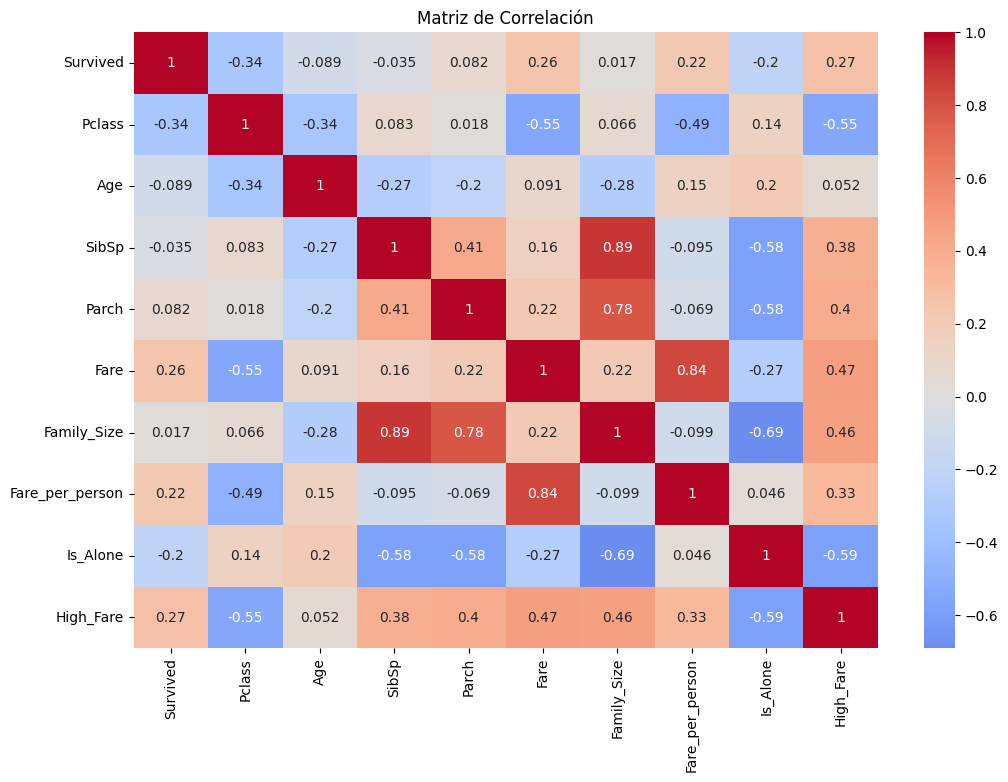

In [ ]:
# Matriz de correlación con las nuevas features
features_to_analyze = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
                       'Fare', 'Family_Size', 'Fare_per_person', 'Is_Alone', 'High_Fare']

plt.figure(figsize=(12, 8))
sns.heatmap(df[features_to_analyze].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

## Los coeficientes que mas tienen relación con survived son: Fare(0.26),Highfare(0.27)

##Según la matriz de correlación, el coeficiente entre "Is_Alone" y "Survived" es -0.2.

##Esto indica una correlación negativa débil. En el contexto del análisis, significa que las personas que viajaban solas ("Is_Alone" = 1) tuvieron una ligera tendencia menor a sobrevivir que aquellas que viajaban acompañadas ("Is_Alone" = 0).

#Actividad

In [3]:
# -----------------------------------------------------------------
## 1. Información general y supervivencia global
# -----------------------------------------------------------------
print("--- Pregunta 1 ---")

# ¿Cuántos pasajeros tenemos en los datos?
total_pasajeros_df = df.shape[0]
print(f"Total de pasajeros en el dataset: {total_pasajeros_df}")

# ¿Cuántos sobrevivieron (1) y cuántos no (0)?
supervivencia_counts = df['Survived'].value_counts()
print("Conteo de supervivencia (0 = No, 1 = Sí):")
print(supervivencia_counts)

# ¿Cuál es la tasa global de supervivencia?
tasa_supervivencia_global = df['Survived'].mean()
print(f"Tasa de supervivencia global: {tasa_supervivencia_global:.2%}")

--- Pregunta 1 ---
Total de pasajeros en el dataset: 891
Conteo de supervivencia (0 = No, 1 = Sí):
Survived
0    549
1    342
Name: count, dtype: int64
Tasa de supervivencia global: 38.38%



--- Pregunta 2 ---
Conteo por sexo:
Sex
male      577
female    314
Name: count, dtype: int64

Desglose por clase y sexo:
Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


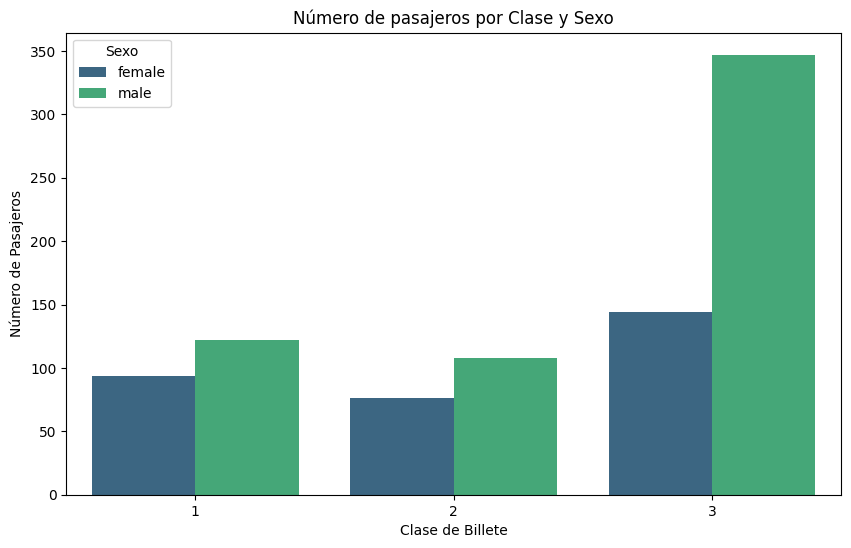

In [4]:
# -----------------------------------------------------------------
## 2. Pasajeros por sexo y clase
# -----------------------------------------------------------------
print("\n--- Pregunta 2 ---")

# ¿Cuántos hombres y mujeres?
sexo_counts = df['Sex'].value_counts()
print("Conteo por sexo:")
print(sexo_counts)

# Desglose por clase y sexo (Tabla)
sexo_por_clase = pd.crosstab(df['Pclass'], df['Sex'])
print("\nDesglose por clase y sexo:")
print(sexo_por_clase)

# Gráfico de desglose por clase y sexo
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Sex', palette='viridis')
plt.title('Número de pasajeros por Clase y Sexo')
plt.xlabel('Clase de Billete')
plt.ylabel('Número de Pasajeros')
plt.legend(title='Sexo')
plt.show()


--- Pregunta 3 ---
Conteo de supervivencia por sexo (0 = No, 1 = Sí):
Survived    0    1  Total
Sex                      
female     81  233    314
male      468  109    577
Total     549  342    891

Tasa de supervivencia por sexo:
Sex
female    74.20%
male      18.89%
Name: Survived, dtype: object


/tmp/ipython-input-2893346135.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', palette='pastel')


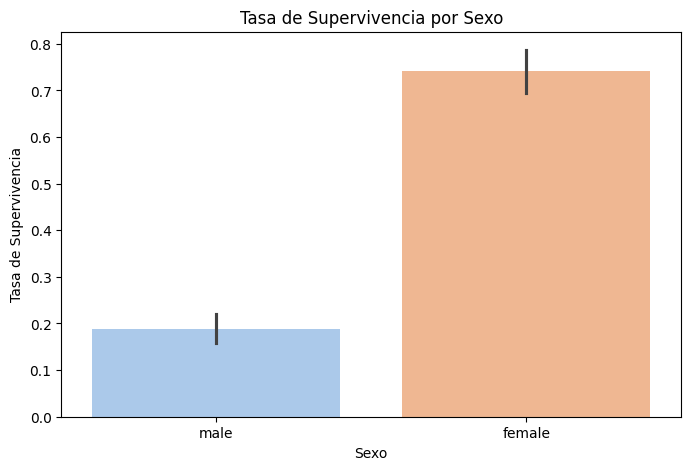

In [5]:
# -----------------------------------------------------------------
## 3. Supervivencia por sexo
# -----------------------------------------------------------------
print("\n--- Pregunta 3 ---")

# ¿Cuántos de cada sexo sobrevivieron? (Tabla)
supervivencia_por_sexo = pd.crosstab(df['Sex'], df['Survived'], margins=True, margins_name="Total")
print("Conteo de supervivencia por sexo (0 = No, 1 = Sí):")
print(supervivencia_por_sexo)

# ¿Tasa de supervivencia por sexo?
tasa_supervivencia_sexo = df.groupby('Sex')['Survived'].mean()
print("\nTasa de supervivencia por sexo:")
print(tasa_supervivencia_sexo.apply(lambda x: f"{x:.2%}"))

# Gráfico de tasa de supervivencia por sexo
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Sex', y='Survived', palette='pastel')
plt.title('Tasa de Supervivencia por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Tasa de Supervivencia')
plt.show()


--- Pregunta 4 ---
Pasajeros con información de edad: 714
Pasajeros sin información de edad (faltantes): 177


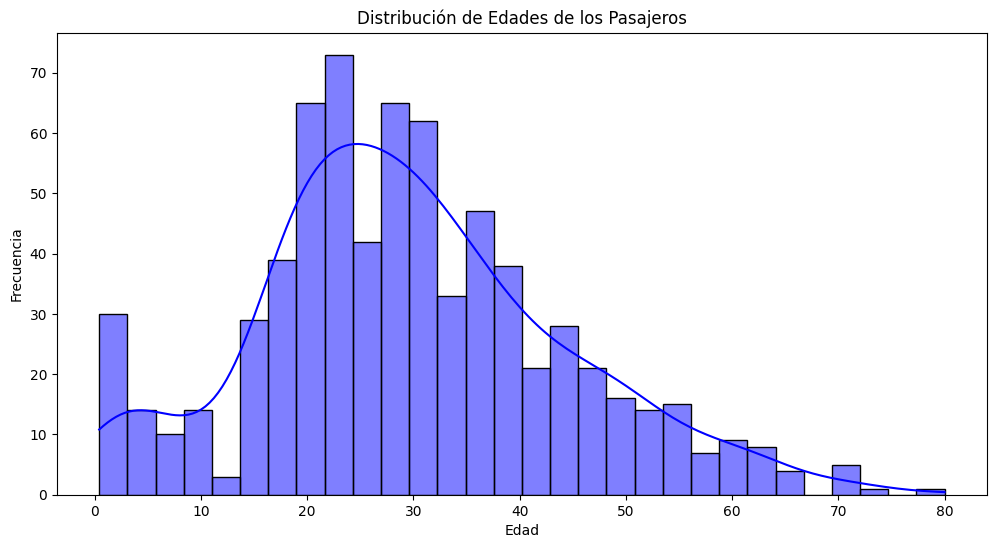

In [6]:
# -----------------------------------------------------------------
## 4. Información y distribución de la edad
# -----------------------------------------------------------------
print("\n--- Pregunta 4 ---")

# ¿Cuántos tienen información de edad?
edad_con_info = df['Age'].count()
print(f"Pasajeros con información de edad: {edad_con_info}")

# ¿Cuántos faltan?
edad_sin_info = df['Age'].isnull().sum()
print(f"Pasajeros sin información de edad (faltantes): {edad_sin_info}")

# Distribución de edades (Histograma)
plt.figure(figsize=(12, 6))
# Usamos dropna() para ignorar los valores nulos solo en el gráfico
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribución de Edades de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


--- Pregunta 5 ---
Mostrando gráfico de violín para Edad por Clase y Sexo...


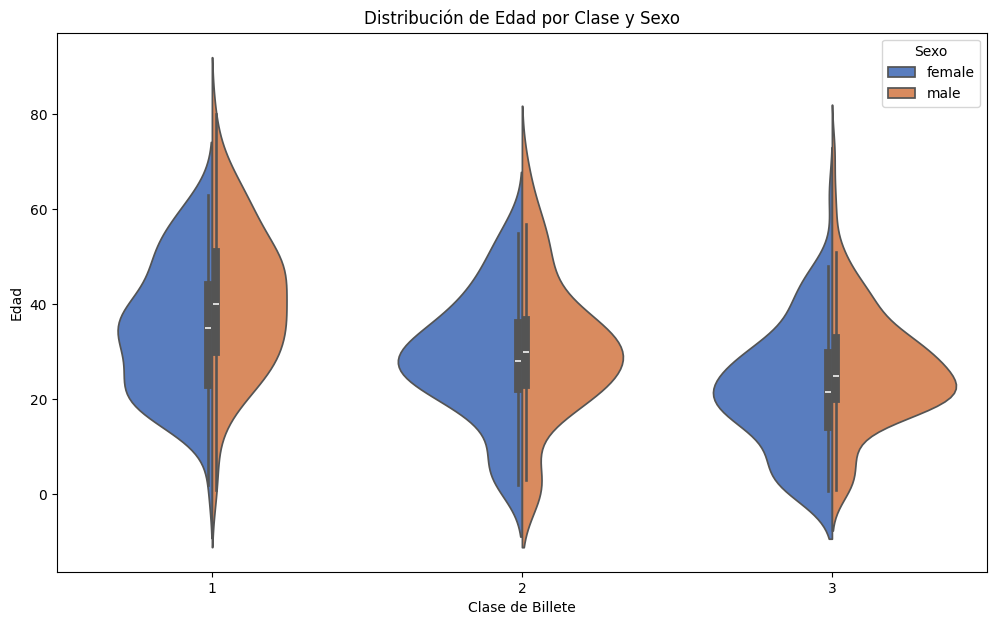

In [7]:
# -----------------------------------------------------------------
## 5. Distribución de edad por clase y sexo
# -----------------------------------------------------------------
print("\n--- Pregunta 5 ---")
print("Mostrando gráfico de violín para Edad por Clase y Sexo...")

# Gráfico de violín para ver la distribución
plt.figure(figsize=(12, 7))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Sex', split=True, palette='muted')
plt.title('Distribución de Edad por Clase y Sexo')
plt.xlabel('Clase de Billete')
plt.ylabel('Edad')
plt.legend(title='Sexo', loc='upper right')
plt.show()
# Nota: Observarás que los pasajeros de 1ra clase tienden a ser mayores,
# y los de 3ra clase tienden a ser más jóvenes.


--- Pregunta 6 ---
Mostrando gráfico de regresión logística por facetas...


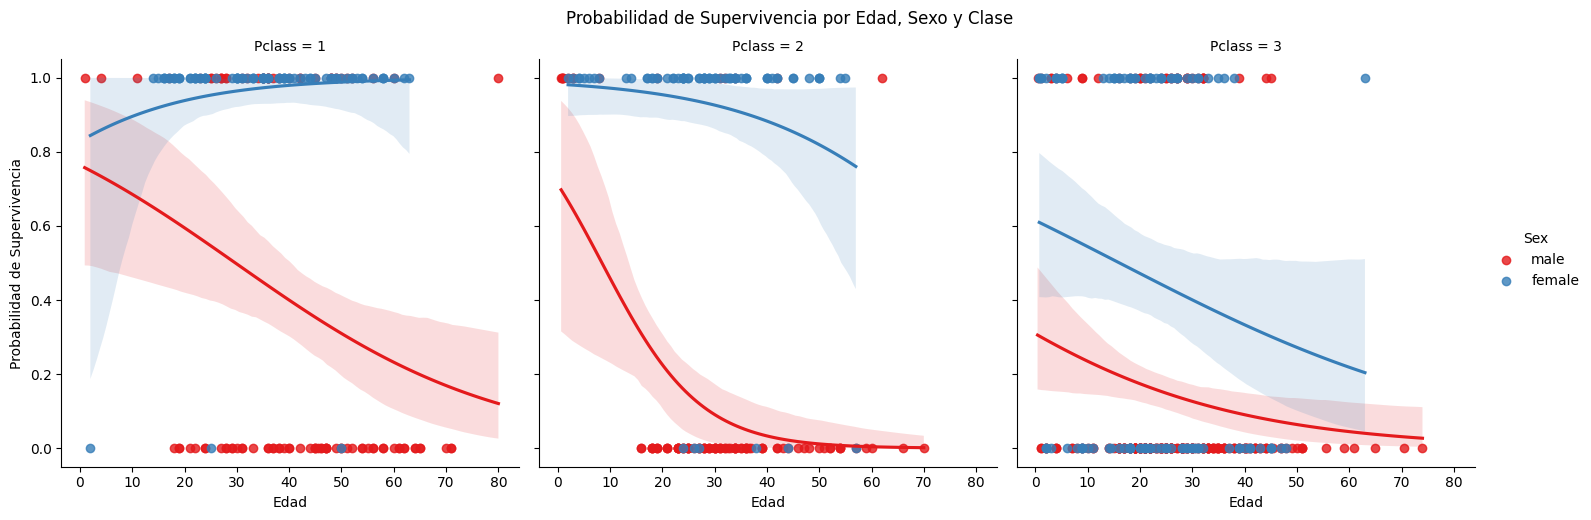

In [8]:
# -----------------------------------------------------------------
## 6. Supervivencia por Edad, Clase y Sexo (Gráfico único)
# -----------------------------------------------------------------
print("\n--- Pregunta 6 ---")
print("Mostrando gráfico de regresión logística por facetas...")

# Un gráfico lmplot con regresión logística es excelente para esto.
# Muestra la *probabilidad* de supervivencia.
# Col=Pclass (columnas por clase)
# Hue=Sex (color por sexo)
# x='Age', y='Survived'
g = sns.lmplot(
    data=df,
    x='Age',
    y='Survived',
    col='Pclass',
    hue='Sex',
    logistic=True,  # Ajusta una curva logística (probabilidad)
    palette='Set1',
    height=5
)
g.set_axis_labels("Edad", "Probabilidad de Supervivencia")
g.fig.suptitle('Probabilidad de Supervivencia por Edad, Sexo y Clase', y=1.03)
plt.show()
# las mujeres (línea Azul) casi siempre tienen
# una mayor probabilidad de sobrevivir que los hombres (línea roja),
# y esta probabilidad disminuye en las clases más bajas.


--- Pregunta 7 ---


/tmp/ipython-input-3945308558.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='FamilySize', palette='Spectral')


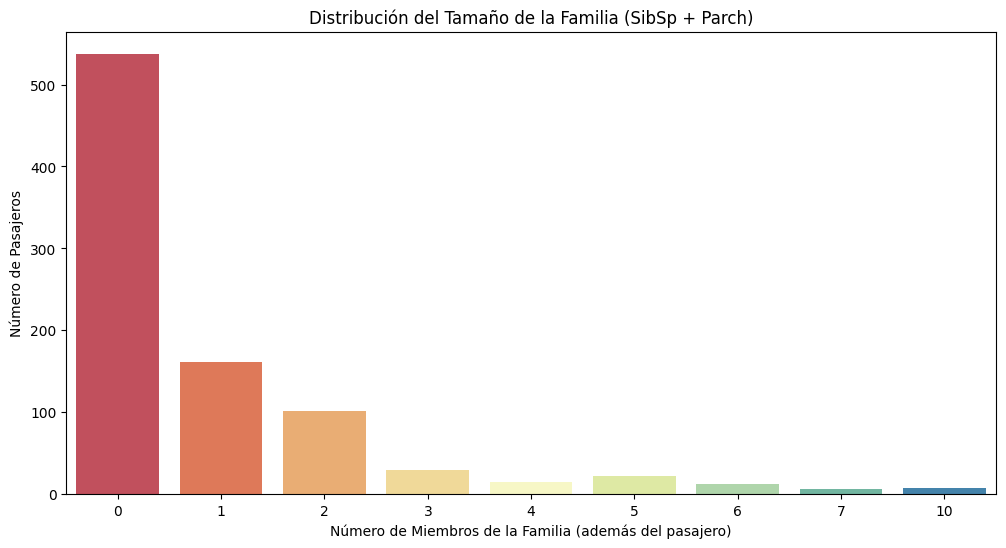

¿Pasajeros viajando solos? (True = Solo, False = Con Familia):
IsAlone
True     537
False    354
Name: count, dtype: int64
La mayoría de los pasajeros viajaban solos.


In [9]:
# -----------------------------------------------------------------
## 7. Tamaño de la familia y viaje en solitario
# -----------------------------------------------------------------
print("\n--- Pregunta 7 ---")

# Crear una nueva columna 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch']

# Distribución del tamaño de la familia
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='FamilySize', palette='Spectral')
plt.title('Distribución del Tamaño de la Familia (SibSp + Parch)')
plt.xlabel('Número de Miembros de la Familia (además del pasajero)')
plt.ylabel('Número de Pasajeros')
plt.show()

# ¿La mayoría viajaba sola?
# Creamos una columna 'IsAlone' (True si FamilySize es 0, False si no)
df['IsAlone'] = (df['FamilySize'] == 0)

conteo_viaje_solo = df['IsAlone'].value_counts()
print("¿Pasajeros viajando solos? (True = Solo, False = Con Familia):")
print(conteo_viaje_solo)

if conteo_viaje_solo[True] > conteo_viaje_solo[False]:
    print("La mayoría de los pasajeros viajaban solos.")
else:
    print("La mayoría de los pasajeros viajaban con familia.")

In [10]:
# -----------------------------------------------------------------
## 8. Familias numerosas y mujeres solas por clase
# -----------------------------------------------------------------
print("\n--- Pregunta 8 ---")

# Parte 1: ¿En qué clase viajaron las familias numerosas?
# Definamos "familia numerosa" como > 3 miembros (FamilySize > 3)
# (Puedes ajustar este umbral)
familias_numerosas = df[df['FamilySize'] > 3]
print("Clase de las familias numerosas (FamilySize > 3):")
print(familias_numerosas['Pclass'].value_counts())
print(f"La mayoría de las familias numerosas viajaron en clase: {familias_numerosas['Pclass'].mode()[0]}")

# Parte 2: ¿Qué clase tiene la *menor proporción* de pasajeras solas?
# (Usamos 'IsAlone' y 'FamilySize' creadas en la P7)
pasajeras = df[df['Sex'] == 'female']
proporcion_mujeres_solas = pasajeras.groupby('Pclass')['IsAlone'].mean()

print("\nProporción de pasajeras que viajaron solas (por clase):")
print(proporcion_mujeres_solas.apply(lambda x: f"{x:.2%}"))
print(f"La clase con la MENOR proporción de pasajeras solas es: Clase {proporcion_mujeres_solas.idxmin()}")


--- Pregunta 8 ---
Clase de las familias numerosas (FamilySize > 3):
Pclass
3    54
1     6
2     2
Name: count, dtype: int64
La mayoría de las familias numerosas viajaron en clase: 3

Proporción de pasajeras que viajaron solas (por clase):
Pclass
1    36.17%
2    42.11%
3    41.67%
Name: IsAlone, dtype: object
La clase con la MENOR proporción de pasajeras solas es: Clase 1


In [11]:
print("\n--- Pregunta 9 ---")
print("Código para calcular la tarifa por persona:")

# 1. Contar cuántas personas comparten cada número de 'Ticket'
ticket_group_size = df.groupby('Ticket')['PassengerId'].transform('count')

# 2. Crear la nueva columna 'Fare_Per_Person'
df['Fare_Per_Person'] = df['Fare'] / ticket_group_size

# 3. Calcular y mostrar la tarifa media por persona
media_tarifa_persona = df['Fare_Per_Person'].mean()
print(f"\nLa tarifa media por persona calculada es: {media_tarifa_persona:.2f}")


--- Pregunta 9 ---
Código para calcular la tarifa por persona:

La tarifa media por persona calculada es: 17.79



--- Pregunta 10 ---
Mostrando gráfico de violín para Tarifa (Fare) por Clase...


/tmp/ipython-input-3758176619.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Pclass', y='Fare', palette='coolwarm')


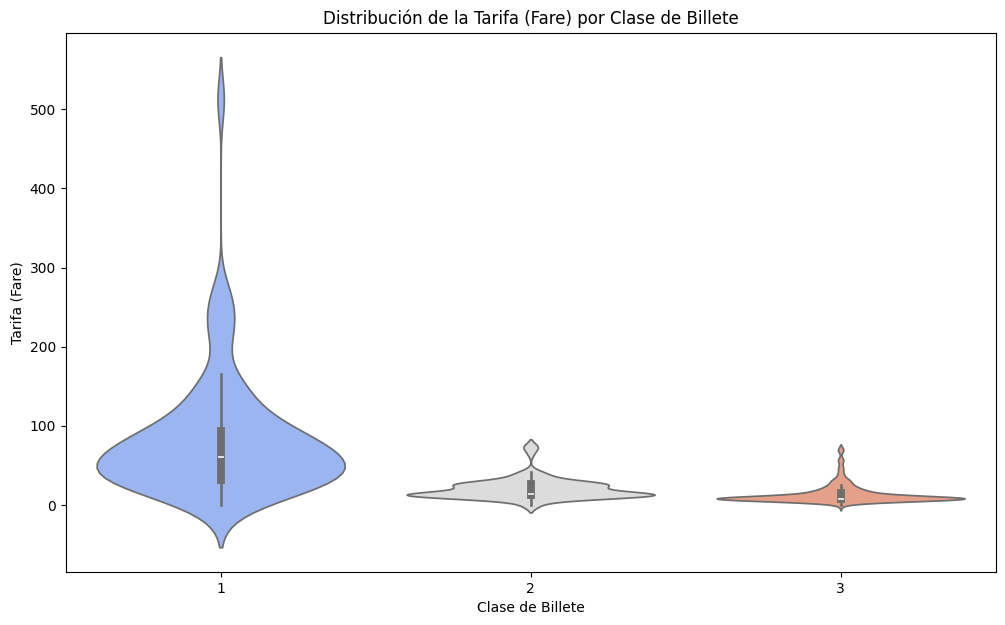

In [12]:
# -----------------------------------------------------------------
## 10. Distribución de la tarifa por clase
# -----------------------------------------------------------------
print("\n--- Pregunta 10 ---")
print("Mostrando gráfico de violín para Tarifa (Fare) por Clase...")

# La tarifa (Fare) tiene valores atípicos muy altos que distorsionan
# un boxplot simple. Un violinplot es una buena alternativa.
plt.figure(figsize=(12, 7))
sns.violinplot(data=df, x='Pclass', y='Fare', palette='coolwarm')
plt.title('Distribución de la Tarifa (Fare) por Clase de Billete')
plt.xlabel('Clase de Billete')
plt.ylabel('Tarifa (Fare)')

# Opcional: Usar escala logarítmica para ver mejor la distribución
# plt.yscale('log') # Descomenta esto si las tarifas altas aplastan el gráfico

plt.show()